In [5]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [6]:
newDataList = []
with open("auto-mpg.data", "r+") as fh:
  for row in fh:
    bLastElement = False
    carName = ""
    currentRow = row.split()
    thisRowList = []
    for element in currentRow:
        if element == "":
            continue
        if bLastElement:
            carName += (" " + element)
        else:
            if ('"'in element):
                bLastElement = True
                carName = element
            else:
                thisRowList.append(element)
    thisRowList.append(carName)
    if len(thisRowList) != 9:
        print ("error line", thisRowList)
    newDataList.append(thisRowList)


In [7]:
myData = pandas.DataFrame(newDataList, columns=
                         ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"])
myData1 = myData.replace({'?':numpy.nan}).dropna()
myData2 = myData1.astype({"mpg": "float", "displacement": "float", "horsepower": "float", "weight": "float",
                        "acceleration": "float", "model_year": "int", "cylinders": "int", "origin": "int"})
print(myData2)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                     car_name  
0            70       1  "chevrolet chevelle malibu"  
1            70       1  

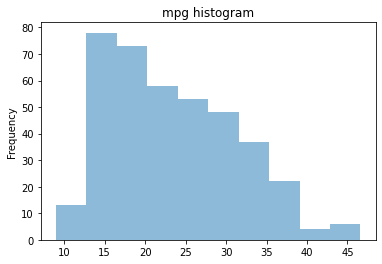

In [14]:
histogramOfMPG = myData2["mpg"].plot.hist(bins=10, alpha=0.5, title="mpg histogram")

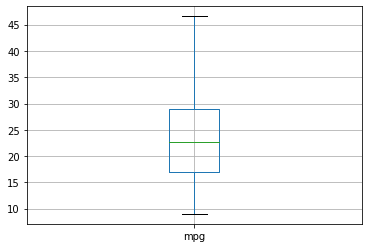

In [17]:
boxPlotOfMPG = myData2.boxplot(column=['mpg'])

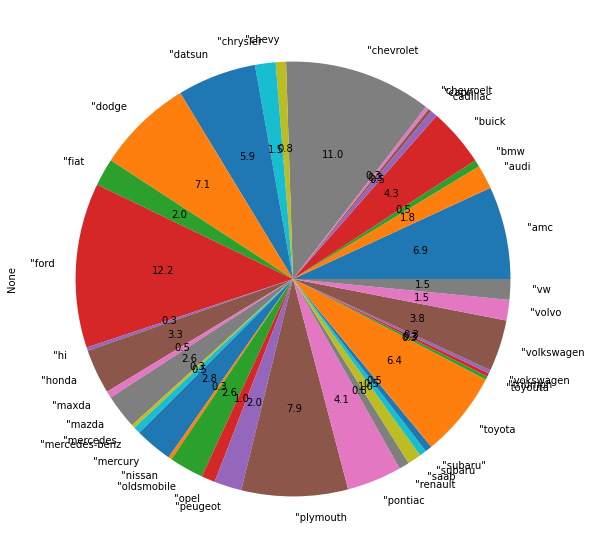

In [24]:
myData2["car_name"] = myData2["car_name"].apply(lambda x: x.split()[0])
carNamePieChart = myData2.groupby('car_name').size().plot(kind='pie', autopct='%.1f', figsize=(10,10))

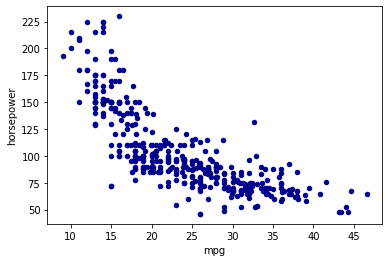

In [4]:
scatterPlot = myData2.plot.scatter(x="mpg", y="horsepower",c="DarkBlue")

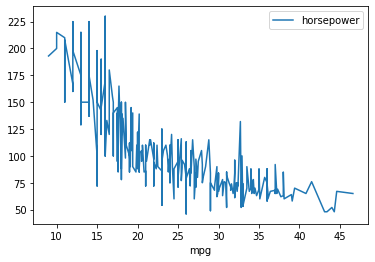

In [10]:
myData2 = myData2.sort_values(by=['mpg'])
linePlot = myData2.plot.line(x='mpg', y='horsepower')